In [1]:
import sys 
import pandas as pd
import numpy as np
import sklearn 
import scipy 
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn

In [2]:
from pandas.plotting import scatter_matrix 
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("Iris.csv")

In [6]:
df.pop('Id')
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:

sorted(df)

['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm', 'Species']

In [8]:

df = df.rename(columns={'SepalLengthCm':'Sepal_Length',
                        'SepalWidthCm':'Sepal_Width',
                        'PetalLengthCm':'Petal_Length',
                        'PetalWidthCm': 'Petal_Width',
                        'Species':'Target'})
print(df.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [9]:
# Check Datatypes
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Target           object
dtype: object

In [10]:
df.drop_duplicates()
    
# remove rows with any null values
df.dropna(axis=0)

# remove columns with any null values
df.dropna(axis=1)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Target          0
dtype: int64

In [12]:
print(df.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


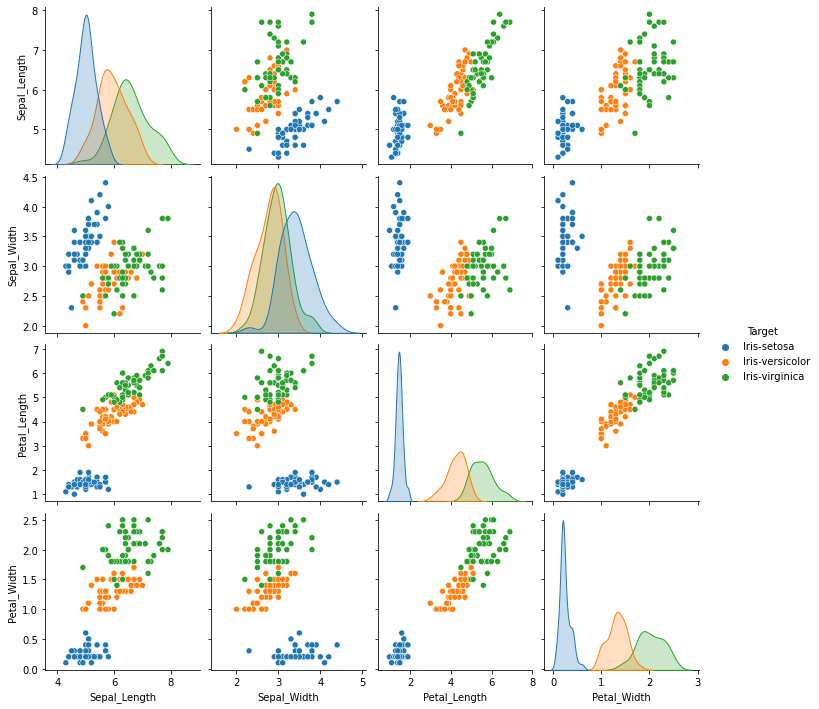

In [13]:
seaborn.pairplot(df, hue='Target')

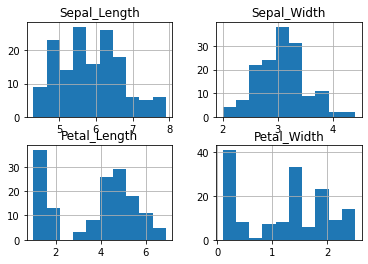

In [14]:
df.hist()
plt.show()

In [15]:
X = df.copy()
Y = X.pop('Target')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
df.Target.value_counts(normalize= True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Target, dtype: float64

In [19]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9499999999999998


In [20]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa


In [21]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, 
                              labels=['Iris-virginica', 'Iris-versicolor','Iris-setosa' ]),
             index=['Iris-virginica', 'Iris-versicolor','Iris-setosa'],
             columns=['Iris-virginica', 'Iris-versicolor','Iris-setosa'])

,Iris-virginica,Iris-versicolor,Iris-setosa
Iris-virginica,12,0,0
Iris-versicolor,1,7,0
Iris-setosa,0,0,10


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [23]:
probs = model.predict_proba(X_test)

#put the probabilities into a dataframe for easier viewing


Y_pp = pd.DataFrame(model.predict_proba(X_test), 
             columns=['Setosa', 'Versicolor', 'Verginica'])
Y_pp.head()

,Setosa,Versicolor,Verginica
0,0.000910,0.195086,0.804005
1,0.034143,0.826634,0.139224
2,0.000083,0.053118,0.946799
3,0.004422,0.392148,0.603431
4,0.924062,0.075937,0.000001
